# Indice NDI

La primer tarea será calcular el índice NDI.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

('Esta imagen es de tipo:', dtype('uint8'), 'con dimensiones:', (1044, 1155, 3))


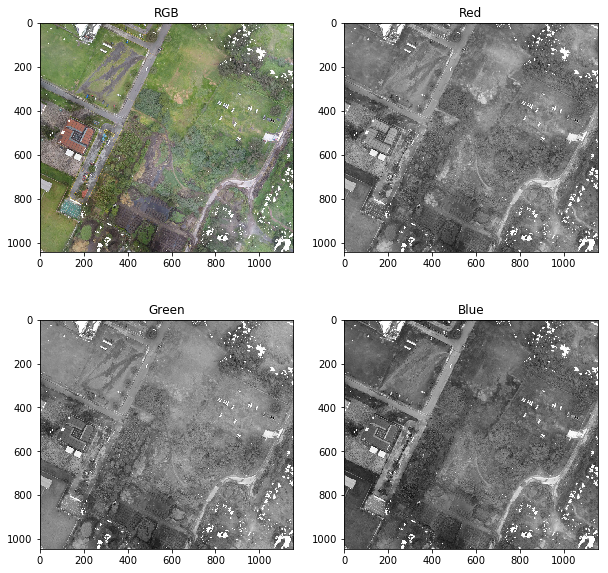

In [4]:
# Leer la imagen 
image = cv2.imread('ESCOM2_small.jpg')
print('Esta imagen es de tipo:', image.dtype, 'con dimensiones:', image.shape)

# Obtener los tres canales de la imagen
b,g,r = cv2.split(image)

# Mostrar los canales
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(r, cmap='gray')
plt.title('Red')

plt.subplot(2,2,3)
plt.imshow(g, cmap='gray')
plt.title('Green')

plt.subplot(2,2,4)
plt.imshow(b, cmap='gray')
plt.title('Blue')
plt.show()

Es importante notar cual es el rango que tienen los valores de gris. Como ejemplo desplegaremos el canal rojo.

In [5]:
print(r)

print('\n El valor máximo en la imagen es:')
print(np.amax(r))
print('\n y valor minimo es:')
print(np.amin(r))

[[177 155 127 ... 141 137 133]
 [118 110 103 ... 139 135 131]
 [110 106 104 ... 144 140 134]
 ...
 [255 255 252 ... 123 120 119]
 [238 248 255 ... 124 121 120]
 [151 178 180 ... 125 122 120]]

 El valor máximo en la imagen es:
255

 y valor minimo es:
0


 Como puedes observar los valores son número enteros que tienen como máximo el 255. Asi que la imagen final deberá de estar en ese rango para ser visualizada.
 
NDI se calcula: 
 
 \begin{equation}
 NDI = \frac{G - R}{G + R}
 \end{equation}
 
 Nota, en el artículo de Meyer[1] la división está al revés, al parecer es un error del artículo.

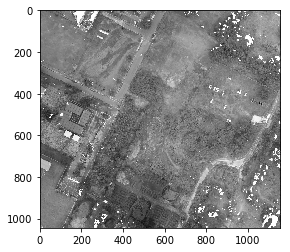

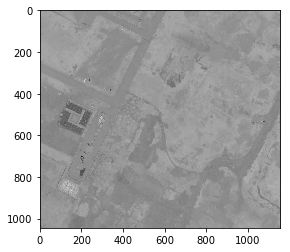

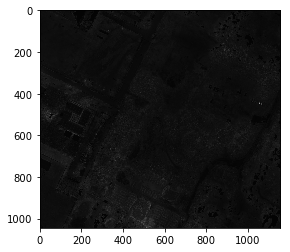

In [6]:
# TODO: Insertar el código para calcular el índice NDI

# Debes de tomar en cuenta que debes permanecer en el rango adecuado. Una función útil es cv2.addWeighted().
# La suma y la resta se pueden trabajar en enteros, sin embargo, la división es preferible mantenerla en flotante
# puedes usar la función imagen.astype('float32') para convertir a flotante
#------------------------------------------------------------------------

alpha = 0.5

# sumamos y mentenemos en el rango
suma = cv2.addWeighted(g, alpha, r, alpha, 0)
# pintar
plt.imshow(suma, cmap='gray')
plt.show()

# restamos y mentenemos en el rango
resta = cv2.addWeighted(g, alpha, r, -alpha, 128)
#pintar
plt.imshow(resta, cmap='gray')
plt.show()

# La división se debe manejar con precacuión, asi que para evitar divisiones por cero agregaremos artificialmente un 1.
suma = cv2.addWeighted(suma, 1, suma, 0, 1)

# Convertimos a flotantes
resta_float = resta.astype('float32')
suma_float = suma.astype('float32')

# División
NDI = resta_float/suma_float

plt.imshow(NDI, cmap='gray')
plt.show()


Si todo funcionó debes visualizar las imagenes de la siguiente forma:

suma = ![suma](suma.png)
resta = ![resta](resta.png)
NDI = ![ndi](ndi.png)

Como podras ver el índice no es muy claro, esto se debe a la división la cual no es lineal. Asi que haremos un umbralizado, por ahora no es importante como se hace el umbralizado, solo es importante que observes el cambio visual y encuentres una correspondencia entre las áreas verdes y las áreas resaltadas despúes del umbralizado.


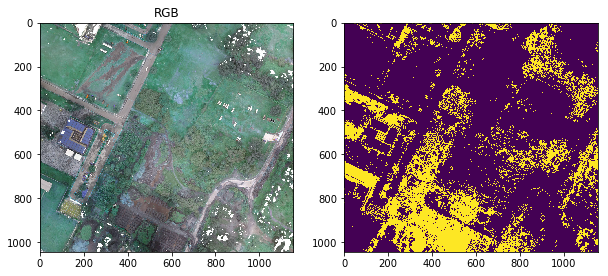

In [28]:
# Para visualizar el índice umbralizaremos la imagen
# utilizaremos una técnica llamada umbralización de Otsu. 
# Por el momento no entraremos en detalle en ella y solo desplegaremos el resultado

# convertir a enteros para usar Otsu
NDI_scaled = NDI.copy()
NDI_scaled = NDI_scaled - NDI.min()
NDI_scaled = NDI_scaled * (255/NDI.max())
NDI_int = NDI_scaled.astype('uint8')

# Thresholding
ret2,th1 =  cv2.threshold(NDI_int, umbral, 255.0, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Comparación
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(th1)


Finalmente si todo funcionó debes visualizar algo como lo siguiente:

![comparacion](comparacion.png)

Ve más allá. ¿Puedes obtener los resultados del paper[1]?

